# Redes Neurais Artificiais - Projeto Prático


# Descrição do Projeto
O objetivo deste projeto é implementar o algoritmo de treinamento do neurônio Perceptron de Rosenblatt para resolver problemas de classificação. O projeto é dividido em três partes:

**Parte I - Resolvendo um Problema Linearmente Separável**:  Nesta parte, utilizamos o arquivo dataAll.txt para treinar o Perceptron e obter a reta que separa as classes no conjunto de dados.

**Parte II - Experimentação:** Aqui,usando o arquivo data3,realizamos experimentos variando a taxa de aprendizado e o intervalo dos pesos do Perceptron, executando 10 repetições para cada configuração.

**Parte III - Validação Holdout em Problema Não-Linearmente Separável**: Na última parte, utilizamos o arquivo dataHoldout.txt para realizar uma validação holdout em um problema não-linearmente separável.

Autores:

* Caroline Pereira (https://github.com/caahp)
* Eric Perin (https://github.com/ericperinn)
* Yara Nunes (https://github.com/yara265)

Link do repositório(GitHub): https://github.com/ericperinn/RNA-2024.1-PP2.1

# **Parte I – Resolvendo um Problema Linearmente Separável**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = np.fromfile("dataAll.txt")
##print(data)
num_rows = data.size // 3
reshaped_array = data.reshape((num_rows, 3))
print(reshaped_array)

# Definindo X e y
X = reshaped_array[:, :-1]  # Todas as colunas exceto a última
y = reshaped_array[:, -1]   # A última coluna

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


In [ ]:
def initialize_weights(input_dim,low,high):
    # Inicializar os pesos aleatoriamente dentro do intervalo [-0.5, 0.5]
    weights = np.random.uniform(low, high, size=(input_dim + 1, 1))  # +1 para o viés
    return weights

In [ ]:
def step_function(net_input):
    return 1 if net_input >= 0 else 0

def train_perceptron(X, y, learning_rate, max_epochs,low,high):
    # Adicionando o bias aos inputs
    X_bias = np.insert(X, 0, 1, axis=1)
    # Inicializando os pesos
    weights = initialize_weights(X_bias.shape[1] - 1,low,high)  # Ignorando o bias na contagem
    epoch = 0
    total_adjustments = 0

    while epoch < max_epochs:
        errors = 0
        adjustments_epoch = 0
        for xi, target in zip(X_bias, y):
            net_input = np.dot(xi, weights)
            output = step_function(net_input)
            error = target - output
            if error != 0:
                # Ajustando os pesos
                weights += learning_rate * error * xi[:, np.newaxis]
                total_adjustments += 1
                adjustments_epoch += 1
                errors += 1
        print(f"Época {epoch + 1}: Número de Ajustes = {adjustments_epoch}")
        if errors == 0:
            break
        epoch += 1

    return weights, total_adjustments, epoch

# Treinamento do Perceptron
weights, total_adjustments, epoch = train_perceptron(X, y, learning_rate=0.1, max_epochs=1000,low=-0.5,high=0.5)
print("Pesos finais:", weights)
print("Número total de ajustes:", total_adjustments)
print("Número de épocas até a convergência:", epoch)


Época 1: Número de Ajustes = 24
Época 2: Número de Ajustes = 0
Pesos finais: [[   0.2270101 ]
 [ 218.38474348]
 [-217.82385987]]
Número total de ajustes: 24
Número de épocas até a convergência: 1


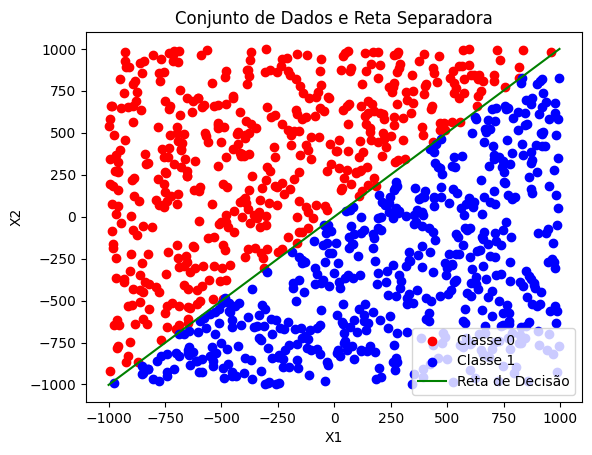

In [ ]:
def plot_decision_boundary(X, y, weights):
    # Separa os exemplos das duas classes
    class_0 = (y == 0)
    class_1 = (y == 1)

    # Plotando os exemplos do conjunto de dados
    plt.scatter(X[class_0][:, 0], X[class_0][:, 1], color='red', label='Classe 0')
    plt.scatter(X[class_1][:, 0], X[class_1][:, 1], color='blue', label='Classe 1')

    # Plotando a reta que separa as classes
    slope = -weights[1] / weights[2]
    intercept = -weights[0] / weights[2]
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, color='green', label='Reta de Decisão')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Conjunto de Dados e Reta Separadora')
    plt.legend()
    plt.show()

# Gerar e exibir o gráfico
plot_decision_boundary(X, y, weights)

# **Parte II – Experimentação**

In [ ]:
data = np.fromfile("data3.txt")
# print(data)
num_rows = data.size // 3
reshaped_array = data.reshape((num_rows, 3))
# print(reshaped_array)

# Definindo X e y
X = reshaped_array[:, :-1]  # Todas as colunas exceto a última
y = reshaped_array[:, -1]   # A última coluna

2.2.1 Configuração: I={-100,100} e n=0.4

Interação: 1
Época 1: Número de Ajustes = 56
Época 2: Número de Ajustes = 42
Época 3: Número de Ajustes = 12
Época 4: Número de Ajustes = 5
Época 5: Número de Ajustes = 2
Época 6: Número de Ajustes = 0
Pesos finais: [[-0.85132149]
 [ 2.42422546]
 [-0.55291953]]
Número total de ajustes: 117
Número de épocas até a convergência: 5

Interação: 2
Época 1: Número de Ajustes = 169
Época 2: Número de Ajustes = 160
Época 3: Número de Ajustes = 60
Época 4: Número de Ajustes = 20
Época 5: Número de Ajustes = 7
Época 6: Número de Ajustes = 3
Época 7: Número de Ajustes = 1
Época 8: Número de Ajustes = 0
Pesos finais: [[-2.43678617]
 [ 8.17522709]
 [-2.51163431]]
Número total de ajustes: 420
Número de épocas até a convergência: 7

Interação: 3
Época 1: Número de Ajustes = 124
Época 2: Número de Ajustes = 46
Época 3: Número de Ajustes = 22
Época 4: Número de Ajustes = 10
Época 5: Número de Ajustes = 5
Época 6: Número de Ajustes = 4
Época 7: Número de Ajustes = 4
Época 8: Número de Ajustes = 3
Época 9

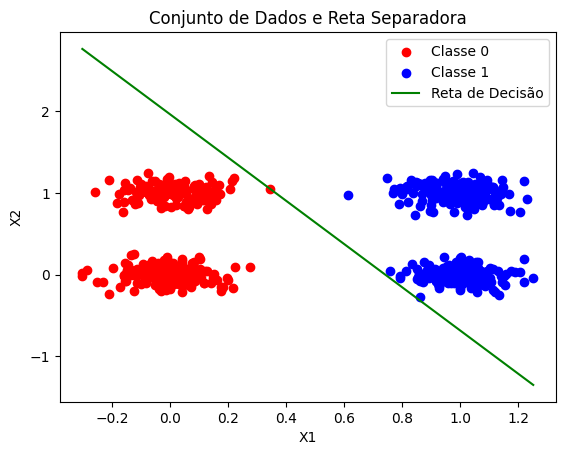

Média da quantidade dos ajustes: 284.8
Desvio padrão da quantidade dos ajustes: 160.9476933665096
Menor quantidade de épocas foi: 5


In [ ]:
SomaAjustes = 0
ajustes_lista = []
minimo = float('inf')

for i in range(1, 11):
    print("Interação:", i)
    weights, total_adjustments, epoch = train_perceptron(X, y, learning_rate=0.4, max_epochs=1000, low=-100, high=100)
    print("Pesos finais:", weights)
    print("Número total de ajustes:", total_adjustments)
    print("Número de épocas até a convergência:", epoch, end="\n\n")

    SomaAjustes += total_adjustments
    ajustes_lista.append(total_adjustments)

    if epoch < minimo:
        minimo = epoch
        indice = i

    if i == 10:
        class_0 = (y == 0)
        class_1 = (y == 1)

        # Plotando os exemplos do conjunto de dados
        plt.scatter(X[class_0][:, 0], X[class_0][:, 1], color='red', label='Classe 0')
        plt.scatter(X[class_1][:, 0], X[class_1][:, 1], color='blue', label='Classe 1')

        # Plotando a reta que separa as classes
        slope = -weights[1] / weights[2]
        intercept = -weights[0] / weights[2]
        x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
        y_values = slope * x_values + intercept
        plt.plot(x_values, y_values, color='green', label='Reta de Decisão')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Conjunto de Dados e Reta Separadora')
        plt.legend()
        plt.show()

mediaAjustes = SomaAjustes / 10
desvio_padrao = np.std(ajustes_lista)

print("Média da quantidade dos ajustes:", mediaAjustes)
print("Desvio padrão da quantidade dos ajustes:", desvio_padrao)
print("Menor quantidade de épocas foi:", minimo)

2.2.2 Configuração: I={-0.5,0.5} e n=0.4

Interação: 1
Época 1: Número de Ajustes = 2
Época 2: Número de Ajustes = 3
Época 3: Número de Ajustes = 2
Época 4: Número de Ajustes = 0
Pesos finais: [[-0.46959476]
 [ 0.76898899]
 [ 0.10165099]]
Número total de ajustes: 7
Número de épocas até a convergência: 3

Interação: 2
Época 1: Número de Ajustes = 2
Época 2: Número de Ajustes = 2
Época 3: Número de Ajustes = 2
Época 4: Número de Ajustes = 3
Época 5: Número de Ajustes = 0
Pesos finais: [[-0.63276043]
 [ 1.48066396]
 [-0.01872066]]
Número total de ajustes: 9
Número de épocas até a convergência: 4

Interação: 3
Época 1: Número de Ajustes = 3
Época 2: Número de Ajustes = 4
Época 3: Número de Ajustes = 2
Época 4: Número de Ajustes = 1
Época 5: Número de Ajustes = 0
Pesos finais: [[-0.65473745]
 [ 1.17550957]
 [ 0.08849371]]
Número total de ajustes: 10
Número de épocas até a convergência: 4

Interação: 4
Época 1: Número de Ajustes = 3
Época 2: Número de Ajustes = 2
Época 3: Número de Ajustes = 3
Época 4: Número de Ajustes = 0
Pesos fi

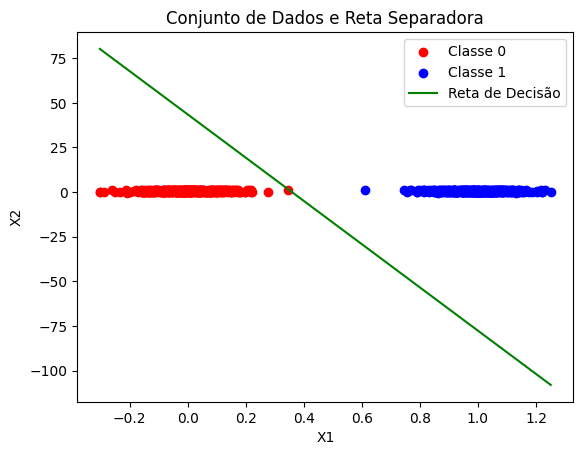

Média da quantidade dos ajustes: 9.2
Desvio padrão da quantidade dos ajustes: 1.6
Menor quantidade de épocas foi: 3


In [ ]:
SomaAjustes = 0
ajustes_lista = []
minimo = float('inf')

for i in range(1, 11):
    print("Interação:", i)
    weights, total_adjustments, epoch = train_perceptron(X, y, learning_rate=0.4, max_epochs=1000, low=-0.5, high=0.5)
    print("Pesos finais:", weights)
    print("Número total de ajustes:", total_adjustments)
    print("Número de épocas até a convergência:", epoch, end="\n\n")

    SomaAjustes += total_adjustments
    ajustes_lista.append(total_adjustments)

    if epoch < minimo:
        minimo = epoch
        indice = i

    if i == 10:
        class_0 = (y == 0)
        class_1 = (y == 1)

        # Plotando os exemplos do conjunto de dados
        plt.scatter(X[class_0][:, 0], X[class_0][:, 1], color='red', label='Classe 0')
        plt.scatter(X[class_1][:, 0], X[class_1][:, 1], color='blue', label='Classe 1')

        # Plotando a reta que separa as classes
        slope = -weights[1] / weights[2]
        intercept = -weights[0] / weights[2]
        x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
        y_values = slope * x_values + intercept
        plt.plot(x_values, y_values, color='green', label='Reta de Decisão')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Conjunto de Dados e Reta Separadora')
        plt.legend()
        plt.show()

mediaAjustes = SomaAjustes / 10
desvio_padrao = np.std(ajustes_lista)

print("Média da quantidade dos ajustes:", mediaAjustes)
print("Desvio padrão da quantidade dos ajustes:", desvio_padrao)
print("Menor quantidade de épocas foi:", minimo)

2.2.3 Configuração: I={-100,100} e n=0.1

Interação: 1
Época 1: Número de Ajustes = 300
Época 2: Número de Ajustes = 300
Época 3: Número de Ajustes = 254
Época 4: Número de Ajustes = 123
Época 5: Número de Ajustes = 27
Época 6: Número de Ajustes = 9
Época 7: Número de Ajustes = 6
Época 8: Número de Ajustes = 4
Época 9: Número de Ajustes = 4
Época 10: Número de Ajustes = 3
Época 11: Número de Ajustes = 3
Época 12: Número de Ajustes = 2
Época 13: Número de Ajustes = 2
Época 14: Número de Ajustes = 2
Época 15: Número de Ajustes = 1
Época 16: Número de Ajustes = 1
Época 17: Número de Ajustes = 1
Época 18: Número de Ajustes = 1
Época 19: Número de Ajustes = 1
Época 20: Número de Ajustes = 1
Época 21: Número de Ajustes = 1
Época 22: Número de Ajustes = 1
Época 23: Número de Ajustes = 1
Época 24: Número de Ajustes = 1
Época 25: Número de Ajustes = 1
Época 26: Número de Ajustes = 1
Época 27: Número de Ajustes = 1
Época 28: Número de Ajustes = 1
Época 29: Número de Ajustes = 1
Época 30: Número de Ajustes = 1
Época 31: Número de Ajustes

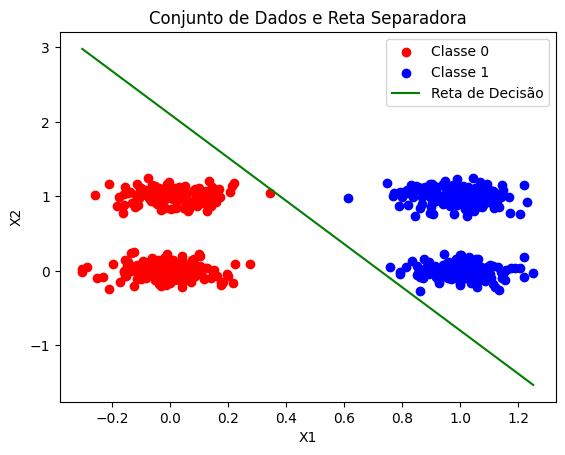

Média da quantidade dos ajustes: 939.7
Desvio padrão da quantidade dos ajustes: 474.56612816339936
Menor quantidade de épocas foi: 8


In [ ]:
SomaAjustes = 0
ajustes_lista = []
minimo = float('inf')

for i in range(1, 11):
    print("Interação:", i)
    weights, total_adjustments, epoch = train_perceptron(X, y, learning_rate=0.1, max_epochs=1000, low=-100, high=100)
    print("Pesos finais:", weights)
    print("Número total de ajustes:", total_adjustments)
    print("Número de épocas até a convergência:", epoch, end="\n\n")

    SomaAjustes += total_adjustments
    ajustes_lista.append(total_adjustments)

    if epoch < minimo:
        minimo = epoch
        indice = i

    if i == 10:
        class_0 = (y == 0)
        class_1 = (y == 1)

        # Plotando os exemplos do conjunto de dados
        plt.scatter(X[class_0][:, 0], X[class_0][:, 1], color='red', label='Classe 0')
        plt.scatter(X[class_1][:, 0], X[class_1][:, 1], color='blue', label='Classe 1')

        # Plotando a reta que separa as classes
        slope = -weights[1] / weights[2]
        intercept = -weights[0] / weights[2]
        x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
        y_values = slope * x_values + intercept
        plt.plot(x_values, y_values, color='green', label='Reta de Decisão')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Conjunto de Dados e Reta Separadora')
        plt.legend()
        plt.show()

mediaAjustes = SomaAjustes / 10
desvio_padrao = np.std(ajustes_lista)

print("Média da quantidade dos ajustes:", mediaAjustes)
print("Desvio padrão da quantidade dos ajustes:", desvio_padrao)
print("Menor quantidade de épocas foi:", minimo)

2.2.4 Configuração: I={-0.5,0.5} e n=0.1

Interação: 1
Época 1: Número de Ajustes = 3
Época 2: Número de Ajustes = 2
Época 3: Número de Ajustes = 0
Pesos finais: [[-0.15513711]
 [ 0.39563181]
 [-0.07166081]]
Número total de ajustes: 5
Número de épocas até a convergência: 2

Interação: 2
Época 1: Número de Ajustes = 6
Época 2: Número de Ajustes = 4
Época 3: Número de Ajustes = 0
Pesos finais: [[-0.13639739]
 [ 0.18817622]
 [ 0.02513176]]
Número total de ajustes: 10
Número de épocas até a convergência: 2

Interação: 3
Época 1: Número de Ajustes = 2
Época 2: Número de Ajustes = 1
Época 3: Número de Ajustes = 0
Pesos finais: [[-0.21211298]
 [ 0.30456989]
 [ 0.03767479]]
Número total de ajustes: 3
Número de épocas até a convergência: 2

Interação: 4
Época 1: Número de Ajustes = 6
Época 2: Número de Ajustes = 1
Época 3: Número de Ajustes = 0
Pesos finais: [[-0.20017785]
 [ 0.46964953]
 [-0.01177444]]
Número total de ajustes: 7
Número de épocas até a convergência: 2

Interação: 5
Época 1: Número de Ajustes = 4
Época 2: Número de Ajus

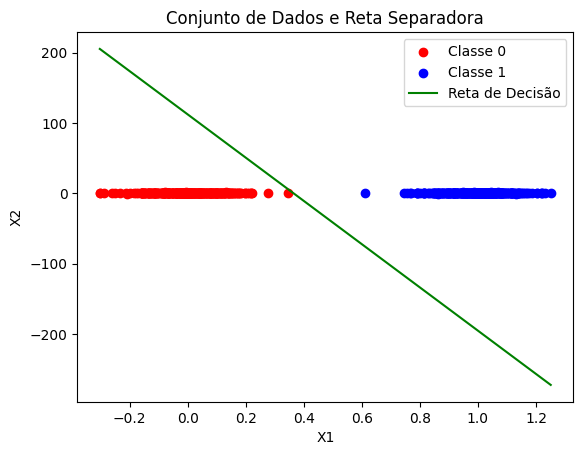

Média da quantidade dos ajustes: 9.0
Desvio padrão da quantidade dos ajustes: 3.8987177379235853
Menor quantidade de épocas foi: 1


In [ ]:
SomaAjustes = 0
ajustes_lista = []
minimo = float('inf')

for i in range(1, 11):
    print("Interação:", i)
    weights, total_adjustments, epoch = train_perceptron(X, y, learning_rate=0.1, max_epochs=1000, low=-0.5, high=0.5)
    print("Pesos finais:", weights)
    print("Número total de ajustes:", total_adjustments)
    print("Número de épocas até a convergência:", epoch, end="\n\n")

    SomaAjustes += total_adjustments
    ajustes_lista.append(total_adjustments)

    if epoch < minimo:
        minimo = epoch
        indice = i

    if i == 10:
        class_0 = (y == 0)
        class_1 = (y == 1)

        # Plotando os exemplos do conjunto de dados
        plt.scatter(X[class_0][:, 0], X[class_0][:, 1], color='red', label='Classe 0')
        plt.scatter(X[class_1][:, 0], X[class_1][:, 1], color='blue', label='Classe 1')

        # Plotando a reta que separa as classes
        slope = -weights[1] / weights[2]
        intercept = -weights[0] / weights[2]
        x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
        y_values = slope * x_values + intercept
        plt.plot(x_values, y_values, color='green', label='Reta de Decisão')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Conjunto de Dados e Reta Separadora')
        plt.legend()
        plt.show()

mediaAjustes = SomaAjustes / 10
desvio_padrao = np.std(ajustes_lista)

print("Média da quantidade dos ajustes:", mediaAjustes)
print("Desvio padrão da quantidade dos ajustes:", desvio_padrao)
print("Menor quantidade de épocas foi:", minimo)

2.2.5 Configuração: I={-100,100} e n=0.01

Interação: 1
Época 1: Número de Ajustes = 395
Época 2: Número de Ajustes = 428
Época 3: Número de Ajustes = 459
Época 4: Número de Ajustes = 480
Época 5: Número de Ajustes = 500
Época 6: Número de Ajustes = 522
Época 7: Número de Ajustes = 530
Época 8: Número de Ajustes = 542
Época 9: Número de Ajustes = 552
Época 10: Número de Ajustes = 564
Época 11: Número de Ajustes = 574
Época 12: Número de Ajustes = 578
Época 13: Número de Ajustes = 581
Época 14: Número de Ajustes = 583
Época 15: Número de Ajustes = 585
Época 16: Número de Ajustes = 587
Época 17: Número de Ajustes = 589
Época 18: Número de Ajustes = 592
Época 19: Número de Ajustes = 594
Época 20: Número de Ajustes = 596
Época 21: Número de Ajustes = 599
Época 22: Número de Ajustes = 580
Época 23: Número de Ajustes = 543
Época 24: Número de Ajustes = 510
Época 25: Número de Ajustes = 500
Época 26: Número de Ajustes = 498
Época 27: Número de Ajustes = 494
Época 28: Número de Ajustes = 465
Época 29: Número de Ajustes = 309
Época 30: 

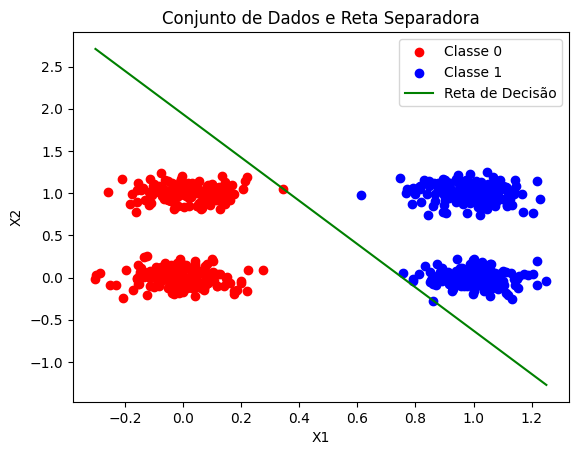

Média da quantidade dos ajustes: 11305.3
Desvio padrão da quantidade dos ajustes: 4177.627509723671
Menor quantidade de épocas foi: 34


In [ ]:
SomaAjustes = 0
ajustes_lista = []
minimo = float('inf')

for i in range(1,11):
  print("Interação:",i)
  weights, total_adjustments, epoch = train_perceptron(X, y, learning_rate=0.01, max_epochs=1000,low=-100,high=100)
  print("Pesos finais:", weights)
  print("Número total de ajustes:", total_adjustments)
  print("Número de épocas até a convergência:", epoch, end="\n\n")
  SomaAjustes += total_adjustments
  ajustes_lista.append(total_adjustments)

  if epoch < minimo:
        minimo = epoch
        indice=i
  if i==10:
    class_0 = (y == 0)
    class_1 = (y == 1)

    # Plotando os exemplos do conjunto de dados
    plt.scatter(X[class_0][:, 0], X[class_0][:, 1], color='red', label='Classe 0')
    plt.scatter(X[class_1][:, 0], X[class_1][:, 1], color='blue', label='Classe 1')

    # Plotando a reta que separa as classes
    slope = -weights[1] / weights[2]
    intercept = -weights[0] / weights[2]
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, color='green', label='Reta de Decisão')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Conjunto de Dados e Reta Separadora')
    plt.legend()
    plt.show()

mediaAjustes = SomaAjustes / 10
desvio_padrao = np.std(ajustes_lista)

print("Média da quantidade dos ajustes:", mediaAjustes)
print("Desvio padrão da quantidade dos ajustes:", desvio_padrao)
print("Menor quantidade de épocas foi:", minimo)

2.2.6 Configuração: I={-0.5,0.5} e n=0.01

Interação: 1
Época 1: Número de Ajustes = 61
Época 2: Número de Ajustes = 24
Época 3: Número de Ajustes = 5
Época 4: Número de Ajustes = 2
Época 5: Número de Ajustes = 2
Época 6: Número de Ajustes = 0
Pesos finais: [[-0.0185707 ]
 [ 0.02764778]
 [ 0.00424815]]
Número total de ajustes: 94
Número de épocas até a convergência: 5

Interação: 2
Época 1: Número de Ajustes = 21
Época 2: Número de Ajustes = 14
Época 3: Número de Ajustes = 5
Época 4: Número de Ajustes = 2
Época 5: Número de Ajustes = 1
Época 6: Número de Ajustes = 2
Época 7: Número de Ajustes = 1
Época 8: Número de Ajustes = 0
Pesos finais: [[-0.08438597]
 [ 0.28999242]
 [-0.08166734]]
Número total de ajustes: 46
Número de épocas até a convergência: 7

Interação: 3
Época 1: Número de Ajustes = 85
Época 2: Número de Ajustes = 54
Época 3: Número de Ajustes = 18
Época 4: Número de Ajustes = 7
Época 5: Número de Ajustes = 3
Época 6: Número de Ajustes = 1
Época 7: Número de Ajustes = 0
Pesos finais: [[-0.05627975]
 [ 0.17896947]
 [-

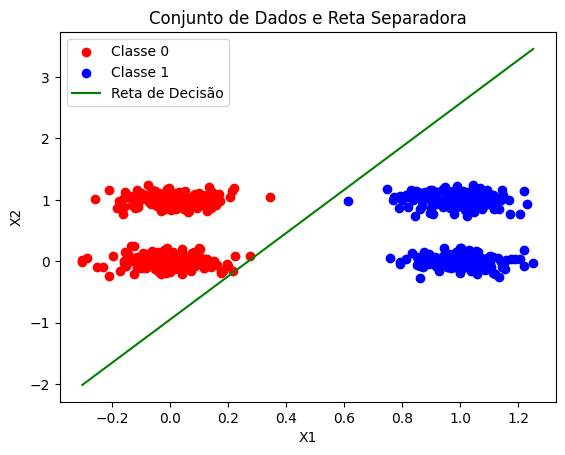

Média da quantidade dos ajustes: 74.9
Desvio padrão da quantidade dos ajustes: 38.7903338474935
Menor quantidade de épocas foi: 3


In [ ]:
SomaAjustes = 0
ajustes_lista = []
minimo = float('inf')

for i in range(1,11):
  print("Interação:",i)
  weights, total_adjustments, epoch = train_perceptron(X, y, learning_rate=0.01, max_epochs=1000,low=-0.5,high=0.5)
  print("Pesos finais:", weights)
  print("Número total de ajustes:", total_adjustments)
  print("Número de épocas até a convergência:", epoch, end="\n\n")
  SomaAjustes += total_adjustments
  ajustes_lista.append(total_adjustments)
  if epoch < minimo:
        minimo = epoch
        indice=i
  if i==10:
    class_0 = (y == 0)
    class_1 = (y == 1)

    # Plotando os exemplos do conjunto de dados
    plt.scatter(X[class_0][:, 0], X[class_0][:, 1], color='red', label='Classe 0')
    plt.scatter(X[class_1][:, 0], X[class_1][:, 1], color='blue', label='Classe 1')

    # Plotando a reta que separa as classes
    slope = -weights[1] / weights[2]
    intercept = -weights[0] / weights[2]
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, color='green', label='Reta de Decisão')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Conjunto de Dados e Reta Separadora')
    plt.legend()
    plt.show()

mediaAjustes = SomaAjustes / 10
desvio_padrao = np.std(ajustes_lista)

print("Média da quantidade dos ajustes:", mediaAjustes)
print("Desvio padrão da quantidade dos ajustes:", desvio_padrao)
print("Menor quantidade de épocas foi:", minimo)

# **Parte III - Validação Holdout em Problema Não-Linearmente Separável**

In [8]:
data = np.fromfile("dataHoldout.txt")
num_rows = data.size // 3
reshaped_array = data.reshape((num_rows, 3))
print(reshaped_array)

# Definindo X e y
X = reshaped_array[:, :-1]  # Todas as colunas exceto a última
y = reshaped_array[:, -1]   # A última coluna

[[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 ...
 [ 0.65980493  1.05876739  0.        ]
 [ 1.09867123  0.87404891  0.        ]
 [ 0.72930655  0.93224271  0.        ]]


In [ ]:
# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento do Perceptron
weights, total_adjustments, epoch = train_perceptron(X_train, y_train, learning_rate=0.1, max_epochs=100, low=-0.5, high=0.5)
print("Pesos finais:", weights)
print("Número total de ajustes:", total_adjustments)
print("Número de épocas até a convergência:", epoch)

Época 1: Número de Ajustes = 55
Época 2: Número de Ajustes = 43
Época 3: Número de Ajustes = 32
Época 4: Número de Ajustes = 30
Época 5: Número de Ajustes = 30
Época 6: Número de Ajustes = 28
Época 7: Número de Ajustes = 30
Época 8: Número de Ajustes = 26
Época 9: Número de Ajustes = 27
Época 10: Número de Ajustes = 29
Época 11: Número de Ajustes = 29
Época 12: Número de Ajustes = 28
Época 13: Número de Ajustes = 32
Época 14: Número de Ajustes = 32
Época 15: Número de Ajustes = 34
Época 16: Número de Ajustes = 32
Época 17: Número de Ajustes = 30
Época 18: Número de Ajustes = 34
Época 19: Número de Ajustes = 30
Época 20: Número de Ajustes = 34
Época 21: Número de Ajustes = 34
Época 22: Número de Ajustes = 30
Época 23: Número de Ajustes = 34
Época 24: Número de Ajustes = 34
Época 25: Número de Ajustes = 30
Época 26: Número de Ajustes = 34
Época 27: Número de Ajustes = 34
Época 28: Número de Ajustes = 34
Época 29: Número de Ajustes = 30
Época 30: Número de Ajustes = 28
Época 31: Número de

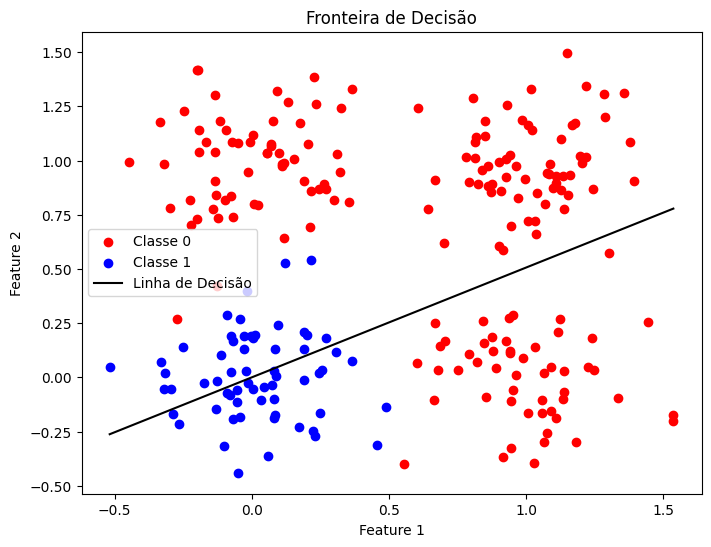

In [ ]:
def plot_decision_boundary(X, y, weights, bias):
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])
    x1_1 = (-weights[0] * x0_1 - bias) / weights[1]
    x1_2 = (-weights[0] * x0_2 - bias) / weights[1]

    plt.figure(figsize=(8,6))

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')

    plt.plot([x0_1, x0_2], [x1_1, x1_2], 'k', label='Linha de Decisão')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Fronteira de Decisão")
    plt.legend()
    plt.show()

plot_decision_boundary(X_test, y_test, weights, 0)

1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;
2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente
fornecido?
3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score.
Para estes cálculos, está liberada a utilização de sklearn.metrics;
4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de
testes.
Apresente dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo
os dados de treinamento e o outro contendo os dados de teste. Disponha tais gráficos lado a lado.

Acurácia nos dados de treinamento: 0.9446428571428571


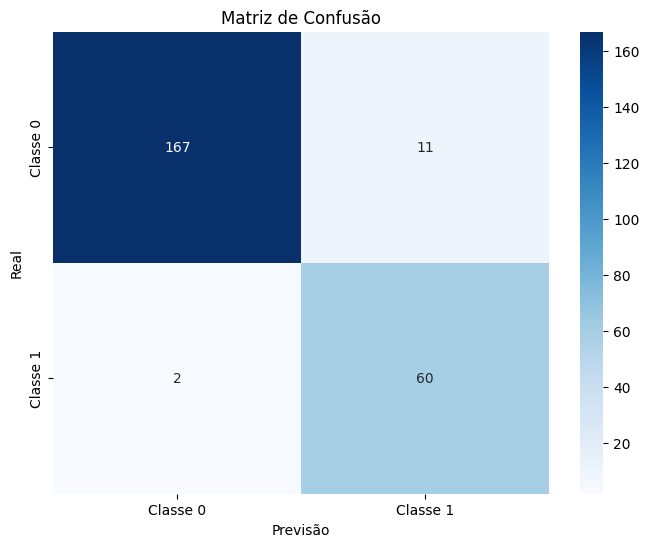

In [ ]:
# Previsões do modelo nos dados de teste
predictions = np.where(np.dot(np.insert(X_test, 0, 1, axis=1), weights) >= 0, 1, 0)

# Acurácia nos dados de treinamento
train_predictions = np.where(np.dot(np.insert(X_train, 0, 1, axis=1), weights) >= 0, 1, 0)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Acurácia nos dados de treinamento:", train_accuracy)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, predictions)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Precisão, Revocação e F-Score nos dados de teste
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Precisão nos dados de teste:", precision)
print("Revocação nos dados de teste:", recall)
print("F-Score nos dados de teste:", f1)

Precisão nos dados de teste: 0.8450704225352113
Revocação nos dados de teste: 0.967741935483871
F-Score nos dados de teste: 0.9022556390977443


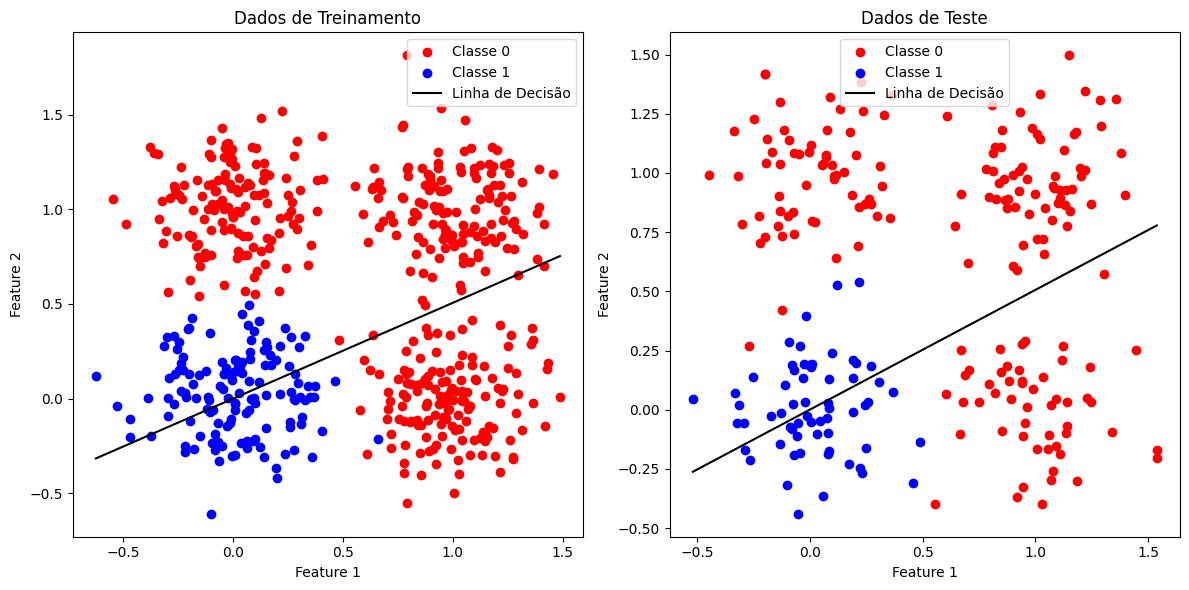

In [ ]:
# Linha de decisão para os dados de treinamento
x0_1_train = np.amin(X_train[:, 0])
x0_2_train = np.amax(X_train[:, 0])
x1_1_train = (-weights[0] * x0_1_train - 0) / weights[1]
x1_2_train = (-weights[0] * x0_2_train - 0) / weights[1]

# Linha de decisão para os dados de teste
x0_1_test = np.amin(X_test[:, 0])
x0_2_test = np.amax(X_test[:, 0])
x1_1_test = (-weights[0] * x0_1_test - 0) / weights[1]
x1_2_test = (-weights[0] * x0_2_test - 0) / weights[1]

plt.figure(figsize=(12, 6))

# Plot dos dados de treinamento
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Classe 1')
plt.plot([x0_1_train, x0_2_train], [x1_1_train, x1_2_train], 'k', label='Linha de Decisão')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dados de Treinamento")
plt.legend()

# Plot dos dados de teste
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Classe 1')
plt.plot([x0_1_test, x0_2_test], [x1_1_test, x1_2_test], 'k', label='Linha de Decisão')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dados de Teste")
plt.legend()

plt.tight_layout()
plt.show()

Apesar do conjunto de dados não ser linearmente separável, o modelo parece bem balanceado,pois teve um bom desempenho classificando as classes.Apesar dos falsos positivos, ele teve acertos: 167 exemplos da Classe 0 foram corretamente classificados corretamente,60 exemplos da Classe 1 foram corretamente classificados como Classe 1 de um conjunto de 1680 exemplos dos dados de treinamento.  A alta acurácia e F1-Score indicam que o modelo é confiável na tarefa de classificação para  as classes.